<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Policy no.  1338 non-null   str    
 1   Age         1338 non-null   int64  
 2   Sex         1338 non-null   str    
 3   BMI         1338 non-null   float64
 4   Price       1338 non-null   float64
 5   Region      1338 non-null   str    
 6   Children    1338 non-null   int64  
 7   Smoker      1338 non-null   str    
dtypes: float64(2), int64(2), str(4)
memory usage: 83.8 KB


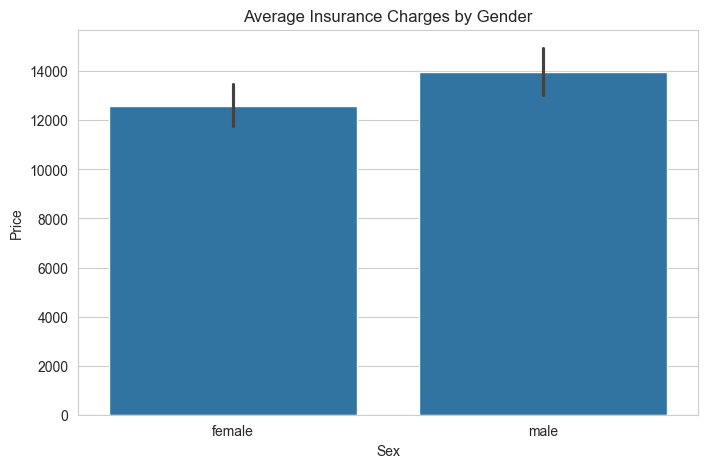

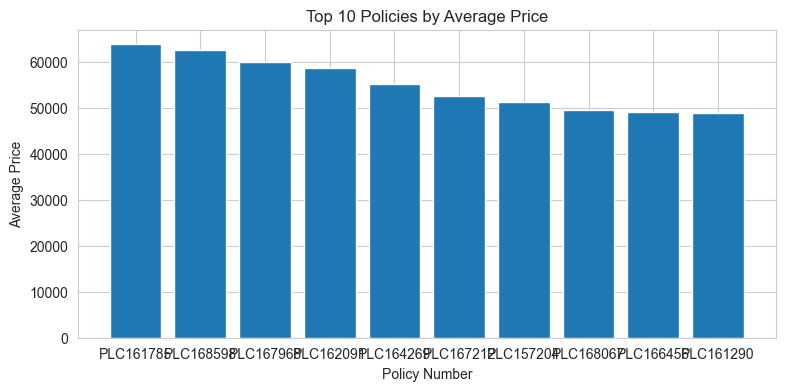

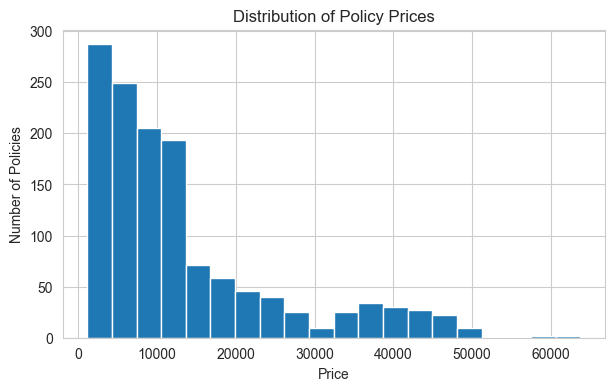

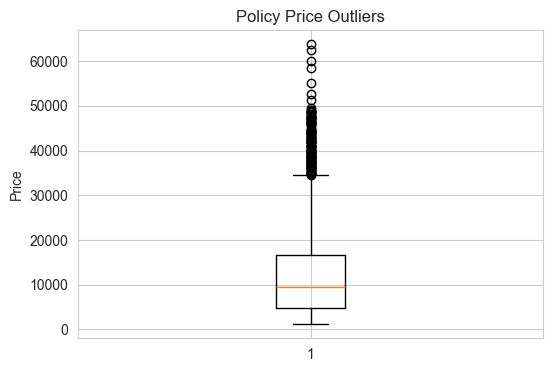

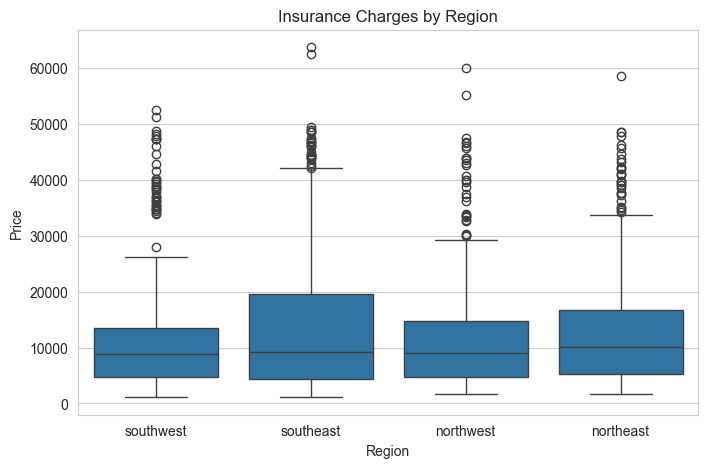

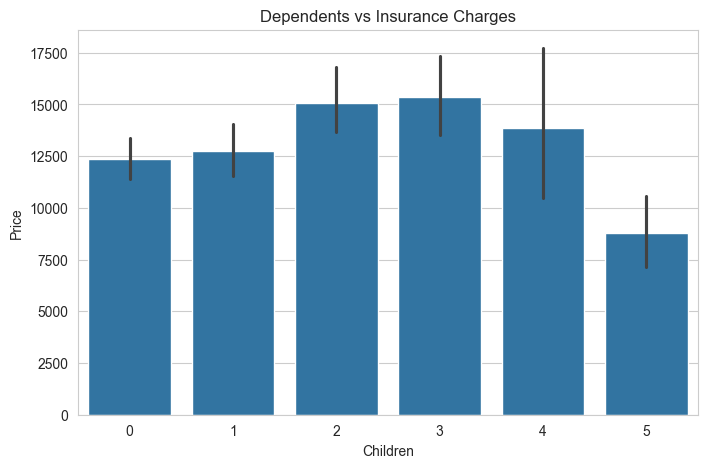

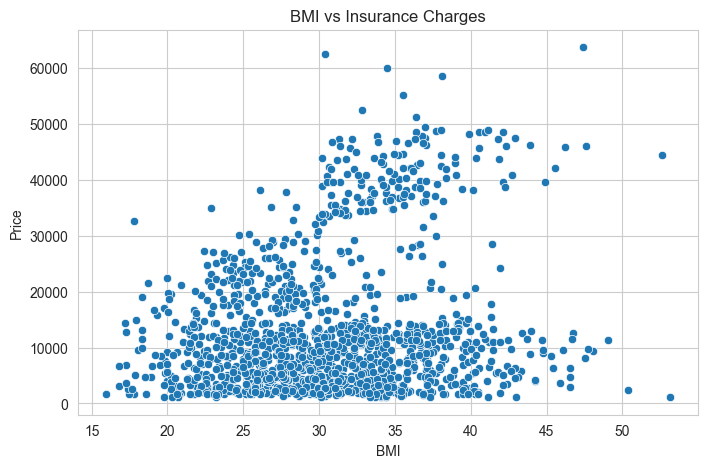

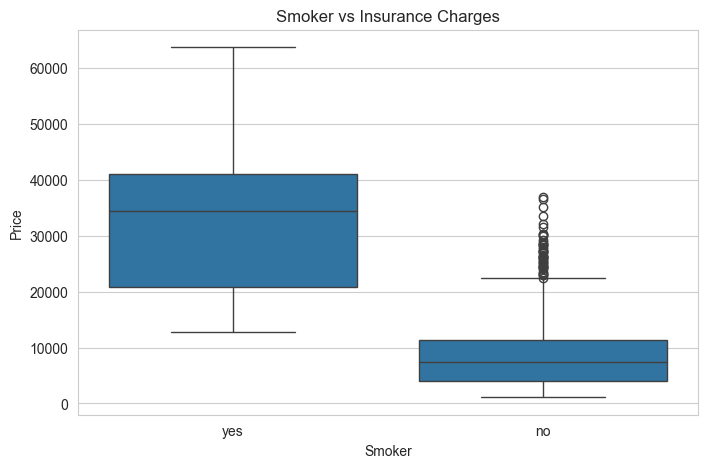

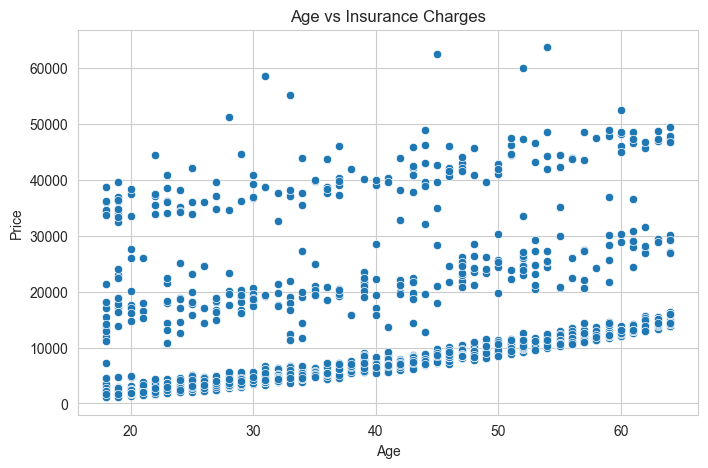

BMI_category
Normal         10409.337709
Obese          15552.335469
Overweight     10987.509891
Underweight     8852.200585
Name: Price, dtype: float64


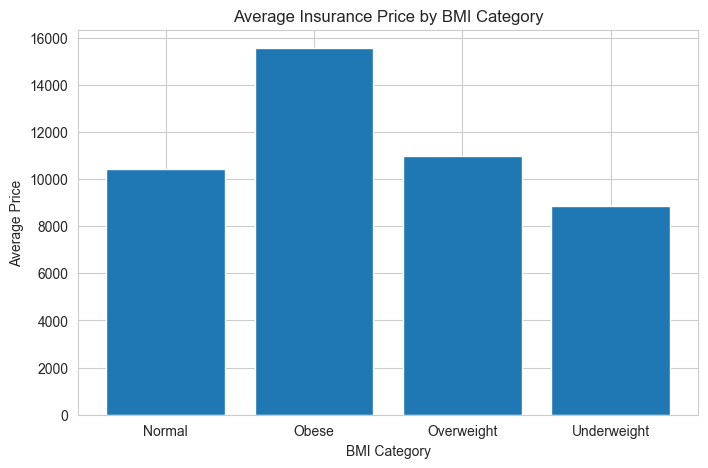

17755824.990759


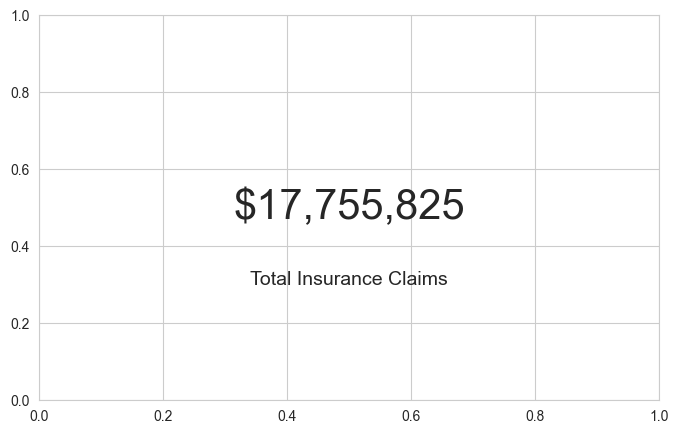

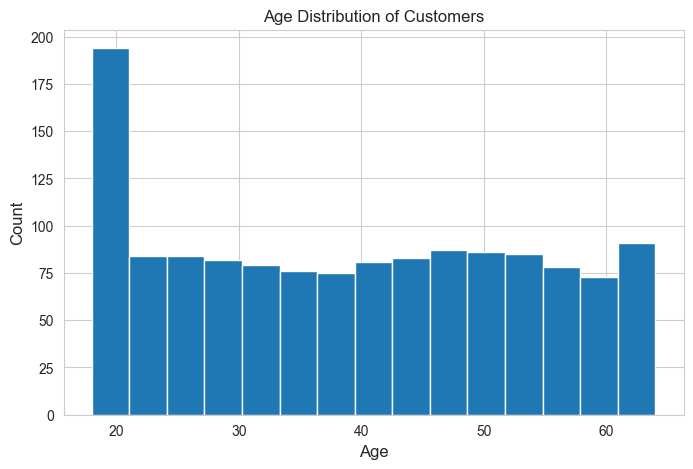

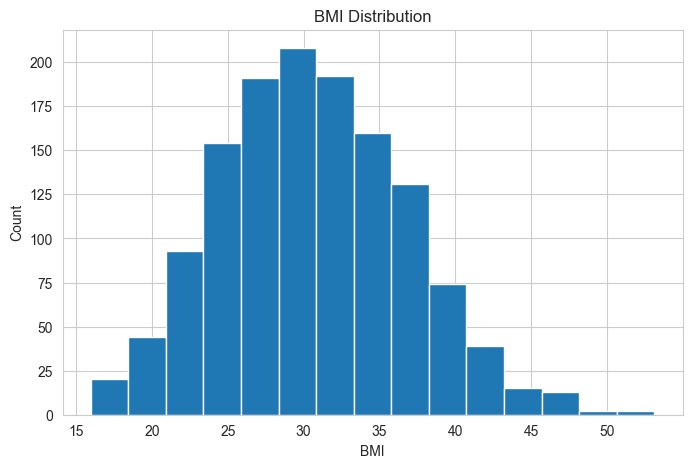

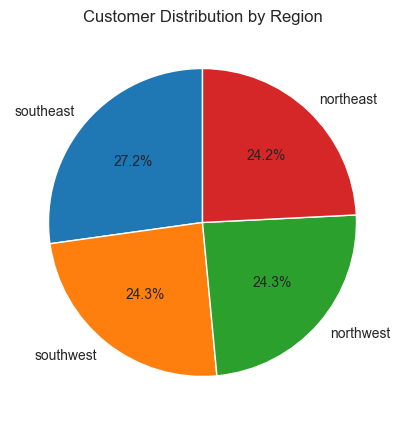

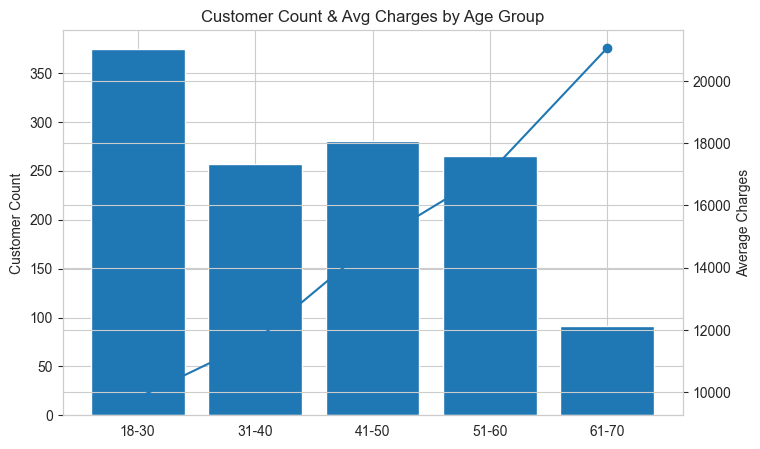

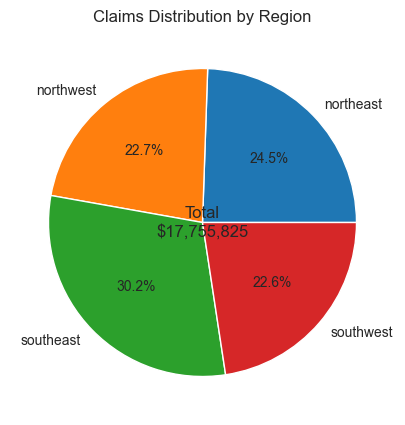

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl




df = pd.read_excel("Medibuddy Insurance Data Price.xlsx")
df = pd.read_excel("Medibuddy Insurance Data Price.xlsx")
df.head()
df.info()
df.shape
df.describe()
#Checking Missing Values
df.isnull().sum()

#Remove Duplicates
df.duplicated().sum()
df = df.drop_duplicates()
#Fix Data Types
df['Age'] = df['Age'].astype(int)
df['Children'] = df['Children'].astype(int)
df['Price'] = df['Price'].astype(float)
##############Exploratory Data Analysis (Answering Business Questions)

####################################################Q1: Does Gender Matter?   Compare male vs female average charges
df.groupby('Sex')['Price'].mean()

sns.barplot(x='Sex', y='Price', data=df)
plt.title("Average Insurance Charges by Gender")
plt.show()

#############################################################################Q2: Average Cost Per Policy
policy_price = df.groupby('Policy no.')['Price'].mean()
top_policies = policy_price.sort_values(ascending=False).head(10)
plt.figure(figsize=(9,4))
plt.bar(top_policies.index.astype(str), top_policies.values)
plt.title("Top 10 Policies by Average Price")
plt.xlabel("Policy Number")
plt.ylabel("Average Price")
plt.show()
##############
plt.figure(figsize=(7,4))
plt.hist(df['Price'], bins=20)
plt.title("Distribution of Policy Prices")
plt.xlabel("Price")
plt.ylabel("Number of Policies")
plt.show()
###########################

plt.figure(figsize=(6,4))
plt.boxplot(df['Price'])
plt.title("Policy Price Outliers")
plt.ylabel("Price")
plt.show()

###############################################################################Q3: Location vs Claims
df.groupby('Region')['Price'].mean()
sns.boxplot(x='Region', y='Price', data=df)
plt.title("Insurance Charges by Region")
plt.show()


####################################################################Q4: Dependents vs Claims
df.groupby('Children')['Price'].mean()
sns.barplot(x='Children', y='Price', data=df)
plt.title("Dependents vs Insurance Charges")
plt.show()

##########################################Q5: BMI vs Claims
sns.scatterplot(x='BMI', y='Price', data=df)
plt.title("BMI vs Insurance Charges")
plt.show()
###########################categorize BMI:
def BMI_category(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif BMI < 25:
        return 'Normal'
    elif BMI < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['BMI'].apply(BMI_category)

###########################################Q6: Smoker vs Non-Smoker
df.groupby('Smoker')['Price'].mean()
sns.boxplot(x='Smoker', y='Price', data=df)
plt.title("Smoker vs Insurance Charges")
plt.show()

####################################################Q7: Age vs Claims
sns.scatterplot(x='Age', y='Price', data=df)
plt.title("Age vs Insurance Charges")
plt.show()

##############################################Q8: BMI-Based Discounts
df.groupby('BMI_category')['Price'].mean()
bmi_price = df.groupby('BMI_category')['Price'].mean()
print(bmi_price)

plt.bar(bmi_price.index, bmi_price.values)
plt.title("Average Insurance Price by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Average Price")
plt.show()

################################################## Total Claims
total_claims = df['Price'].sum()
print(total_claims)

plt.text(0.5, 0.5, f"${total_claims:,.0f}",
        fontsize=30, ha='center', va='center')

plt.text(0.5, 0.3, "Total Insurance Claims",
fontsize=14, ha='center')

#plt.axis('off')
plt.show()


sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


###################################Age Distribution
plt.hist(df['Age'], bins=15)
plt.title("Age Distribution of Customers")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

#######################################  BMI Distribution
plt.hist(df['BMI'], bins=15)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()
####################################### Customer Distribution by Region
region_counts = df['Region'].value_counts()

plt.pie(
    region_counts,
    labels=region_counts.index,
    autopct='%1.1f%%',
startangle=90
)

plt.title("Customer Distribution by Region")
plt.show()

#########################################################– Avg Charges & Customer Count by Age
df['Age_group'] = pd.cut(
    df['Age'],
    bins=[18,30,40,50,60,70],
    labels=['18-30','31-40','41-50','51-60','61-70']
)

summary = df.groupby('Age_group').agg(
    avg_charges=('Price','mean'),
    count=('Price','count')
)

fig, ax1 = plt.subplots()

ax1.bar(summary.index, summary['count'])
ax1.set_ylabel("Customer Count")

ax2 = ax1.twinx()
ax2.plot(summary.index, summary['avg_charges'], marker='o')
ax2.set_ylabel("Average Charges")

plt.title("Customer Count & Avg Charges by Age Group")
plt.show()

############################################ Claims Distribution by Region
region_sum = df.groupby('Region')['Price'].sum()

plt.pie(region_sum, labels=region_sum.index, autopct='%1.1f%%')
centre_text = f"Total\n${total_claims:,.0f}"
plt.text(0, 0, centre_text, ha='center', va='center', fontsize=12)

plt.title("Claims Distribution by Region")
plt.show()

